In [3]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

from warnings import filterwarnings
filterwarnings('ignore')
from matplotlib.colors import ListedColormap
from sklearn.utils import resample
from sklearn import tree,metrics
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix,cohen_kappa_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,StackingClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.svm import SVC
from IPython.display import Image

In [67]:
df = pd.read_csv('/Users/vishnukolluri/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

No Null values present in the data 

In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


In [88]:
print('Attrition count')
print(df.Attrition.value_counts())
print('Attrition in percentage')
print(df.Attrition.value_counts()*100/len(df))

Attrition count
No     1233
Yes     237
Name: Attrition, dtype: int64
Attrition in percentage
No     83.877551
Yes    16.122449
Name: Attrition, dtype: float64


In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

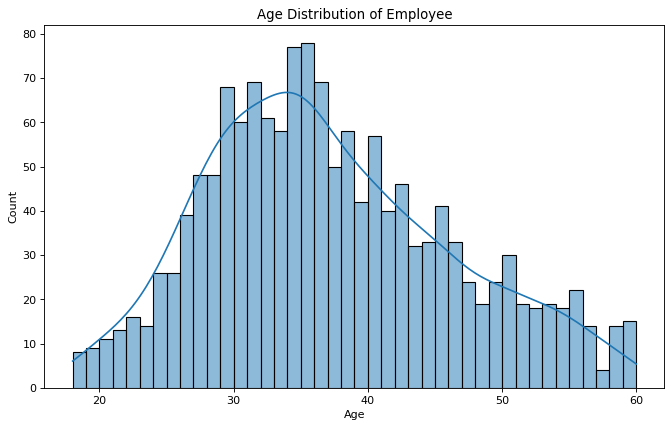

In [8]:
# histogram for age

plt.figure(figsize=(10,6), dpi=80)
sns.histplot(data=df, x='Age', bins=42, kde=True).set_title('Age Distribution of Employee');

Attrition by age

In [11]:
print(df[(df['Attrition'] == 'Yes')].groupby('Age')['Age'].count().sort_values(ascending=False))


Age
31    18
29    18
28    14
33    12
26    12
32    11
35    10
30     9
34     9
24     7
19     6
36     6
37     6
39     6
41     6
25     6
44     6
21     6
20     6
50     5
40     5
58     5
22     5
18     4
23     4
46     4
56     3
55     3
47     3
27     3
52     3
51     2
53     2
38     2
49     2
45     2
43     2
42     2
48     2
Name: Age, dtype: int64


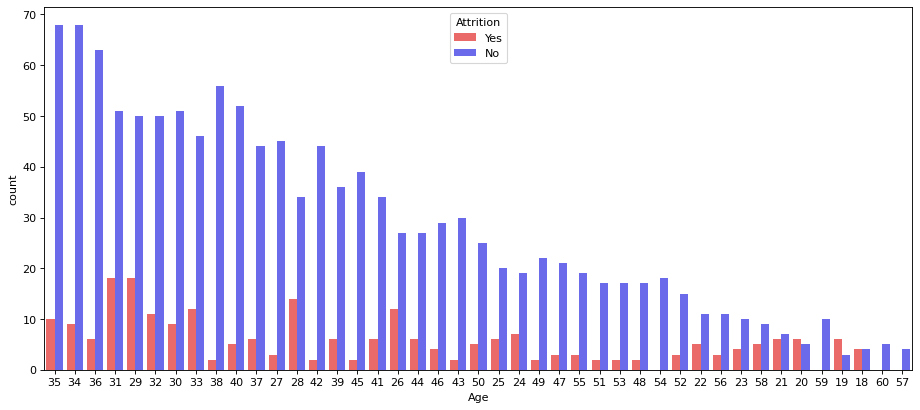

In [12]:
plt.figure(figsize=(14,6), dpi=80)
sns.countplot(data=df, x='Age', hue='Attrition', order = df['Age'].value_counts().index, palette='seismic_r').set_title
('Attrition by Age');

Attrition by Gender

In [13]:
 print(df[(df['Attrition'] == 'Yes')].groupby('Gender')['Gender'].count().sort_values(ascending=False))

Gender
Male      150
Female     87
Name: Gender, dtype: int64


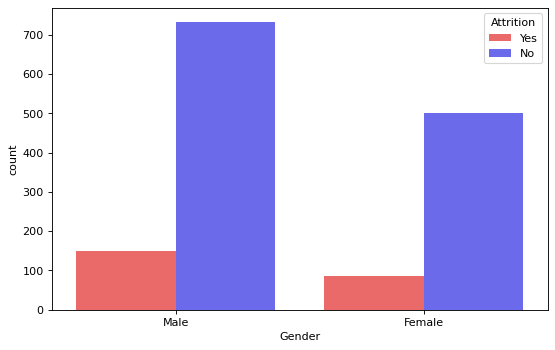

In [14]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df, x='Gender', hue='Attrition', order = df['Gender'].value_counts().index, palette='seismic_r').set_title
('Attrition by Gender');

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64


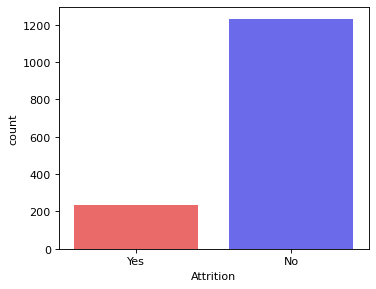

In [15]:
print(df.groupby('Attrition')['Attrition'].count())

plt.figure(figsize=(5,4), dpi=80)
sns.countplot(data=df, x='Attrition', palette='seismic_r');

Attrition by Department

In [16]:
print(df[(df['Attrition'] == 'Yes')].groupby('Department')['Attrition'].count().sort_values(ascending=False))

Department
Research & Development    133
Sales                      92
Human Resources            12
Name: Attrition, dtype: int64


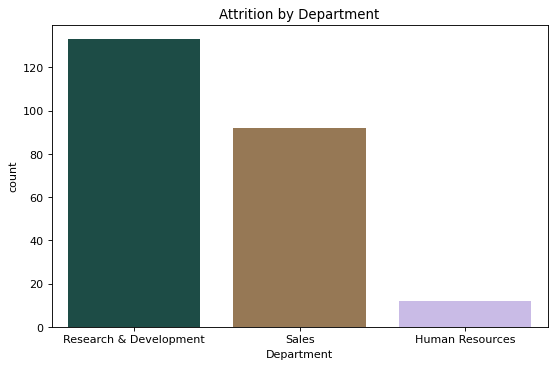

In [17]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Department', palette='cubehelix', order = df['Department']
              .value_counts().index).set_title('Attrition by Department');

Attrition by agerange

In [18]:
agerange = []
for age in df["Age"]:
    if age >= 18 and age < 24:
        agerange.append("18-24")
    elif age >= 25 and age < 31:
        agerange.append("25-31")
    elif age >= 32 and age < 38:
        agerange.append("32-38")
    elif age >= 39 and age < 45:
        agerange.append("39-45")
    elif age >= 46 and age < 52:
        agerange.append("46-52")
    elif age >= 53 and age < 59:
        agerange.append("53-59")
    else:
        agerange.append("60-66")
       
df["AgeRange"] = agerange

In [26]:
print(df.groupby('AgeRange')['AgeRange'].count().sort_values(ascending=False))

AgeRange
32-38    393
25-31    289
39-45    250
60-66    227
46-52    149
53-59     91
18-24     71
Name: AgeRange, dtype: int64


In [28]:
#Retained employyes in the age groups
print(df[(df['Attrition'] == 'Yes')].groupby('AgeRange')['AgeRange'].count().sort_values(ascending=False))

AgeRange
25-31    62
32-38    54
60-66    32
18-24    31
39-45    27
46-52    18
53-59    13
Name: AgeRange, dtype: int64


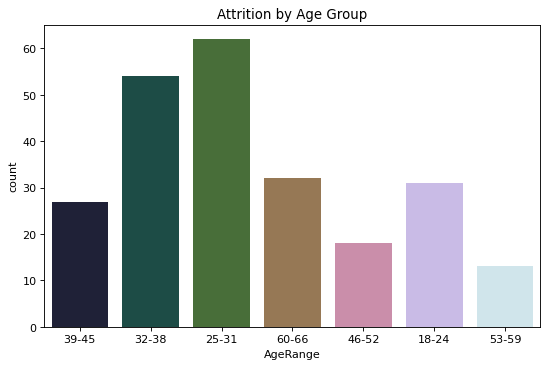

In [29]:
plt.figure(figsize=(8,5), dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='AgeRange', palette='cubehelix').set_title('Attrition by Age Group');

Attrition by Education
1 - Below College, 2 - College, 3 - Bachelor, 4 - Master, 5 - Doctor

In [31]:
#count of employees with education
print(df.groupby('Education')['Attrition'].count().sort_values(ascending=False))


Education
3    572
4    398
2    282
1    170
5     48
Name: Attrition, dtype: int64


In [32]:
#Attrition employees education
print(df[(df['Attrition'] == 'Yes')].groupby('Education')['Attrition'].count().sort_values(ascending=False))


Education
3    99
4    58
2    44
1    31
5     5
Name: Attrition, dtype: int64


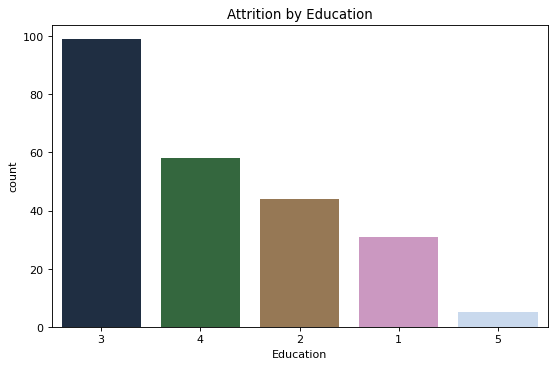

In [33]:
plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='Education', order=df['Education'].value_counts().index, 
              palette='cubehelix').set_title('Attrition by Education');

Attrition by Environment Satisfaction
1 - Low, 2 - Medium, 3 - High, 4 - Very High

In [35]:
print(df.groupby('EnvironmentSatisfaction')['Attrition'].count().sort_values(ascending=False))

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: Attrition, dtype: int64


In [36]:
#Attrition employees
print(df[(df['Attrition'] == 'Yes')].groupby('EnvironmentSatisfaction')['Attrition'].count().sort_values(ascending=False))

EnvironmentSatisfaction
1    72
3    62
4    60
2    43
Name: Attrition, dtype: int64


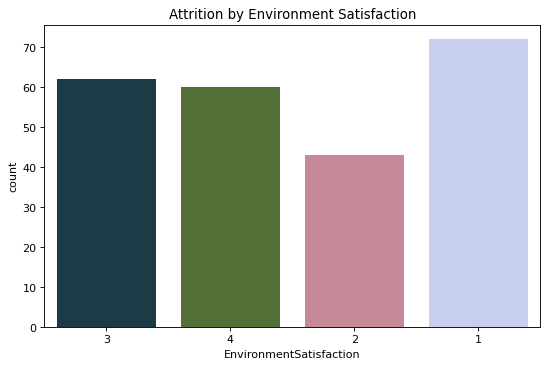

In [37]:
plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='EnvironmentSatisfaction', order=df['EnvironmentSatisfaction']
              .value_counts().index, palette='cubehelix').set_title('Attrition by Environment Satisfaction');

Attrition by JobSatisfaction
1 - Low, 2 - Medium, 3 - High, 4 - Very High

In [38]:
print(df.groupby('JobSatisfaction')['Attrition'].count().sort_values(ascending=False))

JobSatisfaction
4    459
3    442
1    289
2    280
Name: Attrition, dtype: int64


In [40]:
#Attrition employyes 
print(df[(df['Attrition'] == 'Yes')].groupby('JobSatisfaction')['Attrition'].count().sort_values(ascending=False))

JobSatisfaction
3    73
1    66
4    52
2    46
Name: Attrition, dtype: int64


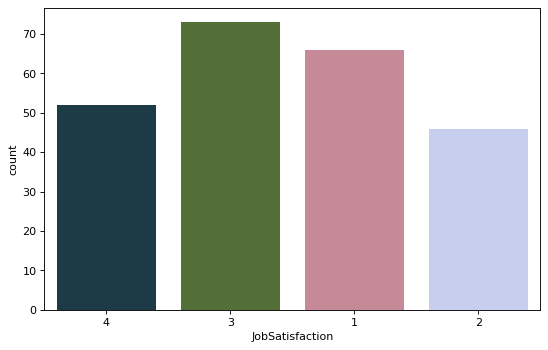

In [41]:
plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df[(df['Attrition'] == 'Yes')], x='JobSatisfaction', order=df['JobSatisfaction'].value_counts().index, palette='cubehelix');

Distribution of employees by the education field


In [42]:
print(df.groupby('EducationField')['EducationField'].count().sort_values(ascending=False))

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


In [43]:
print(df[(df['Attrition'] == 'Yes')].groupby('EducationField')['EducationField'].count().sort_values(ascending=False))

EducationField
Life Sciences       89
Medical             63
Marketing           35
Technical Degree    32
Other               11
Human Resources      7
Name: EducationField, dtype: int64


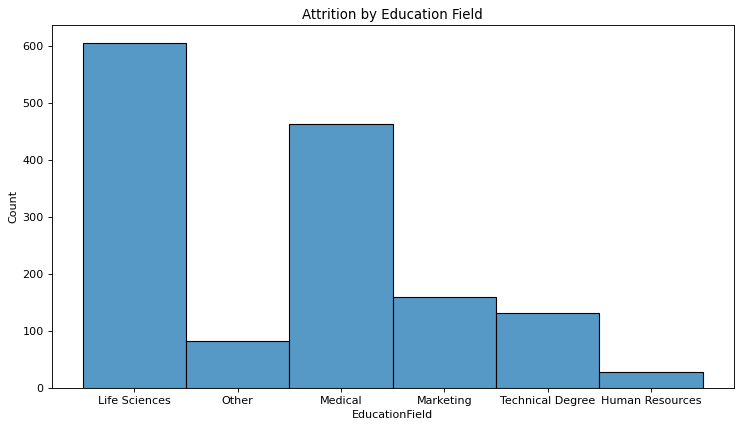

In [44]:
plt.figure(figsize=(11,6), dpi=80)
sns.histplot(data=df, x='EducationField').set_title('Attrition by Education Field');

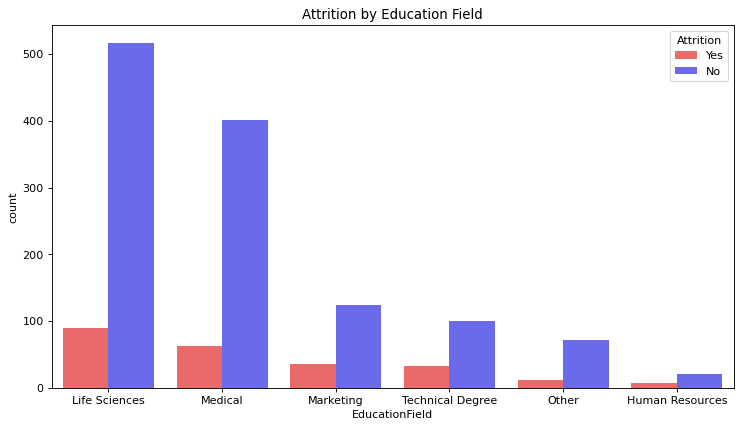

In [45]:
plt.figure(figsize=(11,6), dpi=80)
sns.countplot(data=df, x='EducationField', hue='Attrition', order = df['EducationField'].value_counts().index, palette='seismic_r').set_title('Attrition by Education Field');

Attrition by Marital Status


In [46]:
print(df.groupby('MaritalStatus')['Attrition'].count().sort_values(ascending=False))

MaritalStatus
Married     673
Single      470
Divorced    327
Name: Attrition, dtype: int64


In [47]:
print(df[(df['Attrition'] == 'Yes')].groupby('MaritalStatus')['Attrition'].count().sort_values(ascending=False))

MaritalStatus
Single      120
Married      84
Divorced     33
Name: Attrition, dtype: int64


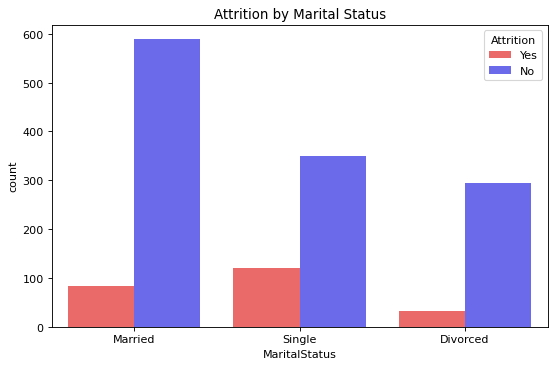

In [48]:
plt.figure(figsize=(8,5),dpi=80)
sns.countplot(data=df, x='MaritalStatus', hue='Attrition', order=df['MaritalStatus'].value_counts().index, palette='seismic_r').set_title('Attrition by Marital Status');

In [51]:
#Attrition for Age 60
df.loc[df['Age']==60][['Age','TotalWorkingYears','Attrition','EnvironmentSatisfaction','HourlyRate','DistanceFromHome']]

,Age,TotalWorkingYears,Attrition,EnvironmentSatisfaction,HourlyRate,DistanceFromHome
411,60,33,No,1,41,7
427,60,22,No,3,80,28
536,60,10,No,1,84,16
879,60,12,No,2,52,7
1209,60,19,No,3,92,1


Employyes aged 60 are lickley stay the company and no one has highest environmental satisfaction



In [53]:
#Attrition for employees with more tham 40 years exp at the company
df.loc[df['YearsAtCompany']>=40][['TotalWorkingYears','Attrition','Age','EnvironmentSatisfaction','HourlyRate','DistanceFromHome']]

,TotalWorkingYears,Attrition,Age,EnvironmentSatisfaction,HourlyRate,DistanceFromHome
126,40,Yes,58,4,94,23


Employee has highest environmental satisfaction but not stayed in the company

In [54]:
df.describe(include=object)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,AgeRange
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2,7
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,32-38
freq,1233,1043,961,606,882,326,673,1470,1054,393


In [55]:
df.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [56]:
#Certain variables do not have any variability in them. Such variables are:
#Employee Count: This is just a count of employee and the value it takes is always 1.
#Over18: This variable describes if an employee is over 18 years of age. It takes the value ‘Yes’ in all cases.
#StandardHours: The standard number of hours an employee works in a week. Its constant value is 80


Checking for outlier in the data 

In [69]:
df=df.drop('EmployeeCount',axis=1)

In [70]:
df=df.drop('StandardHours',axis=1)

<AxesSubplot:>

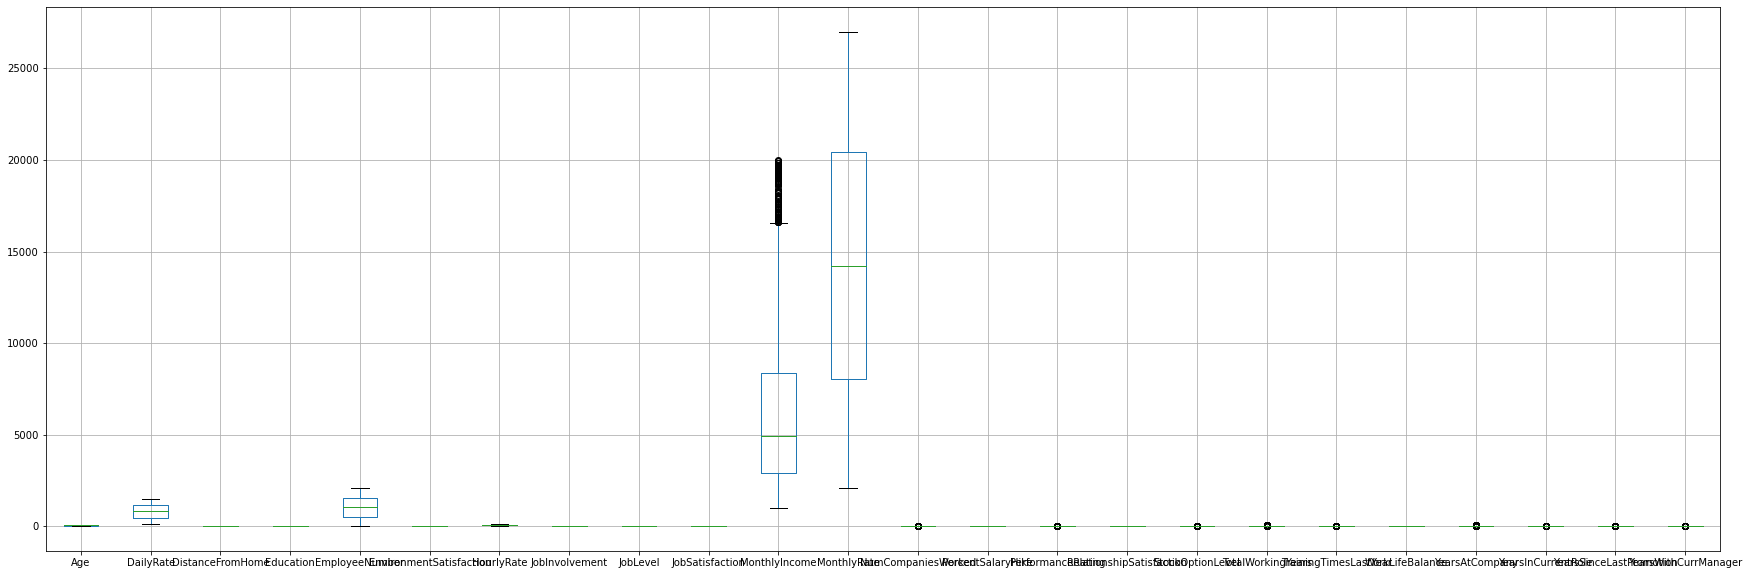

In [71]:
plt.figure(figsize=(30,10))
df.boxplot() 

In [61]:
 # Monthly income has outliers to be treated

In [77]:
dfn=df.select_dtypes(include=np.number)
q1=dfn.quantile(0.25)
q3=dfn.quantile(0.75)
iqr=q3-q1
df1=df[~((df <(q1-iqr*1.5))|(df >(q3+iqr*1.5))).any(axis=1)]
print(df.shape,df1.shape)

(1470, 33) (779, 33)


<AxesSubplot:>

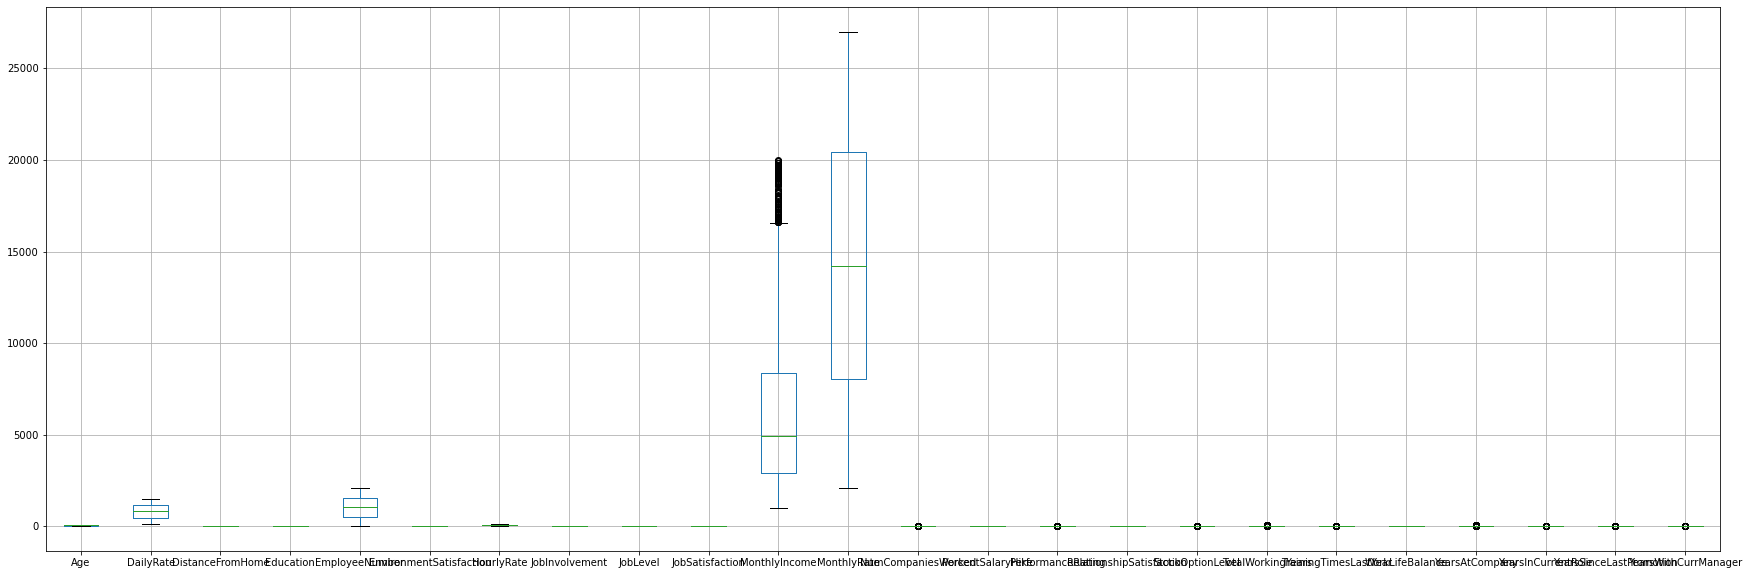

In [78]:
plt.figure(figsize=(30,10))
df.boxplot()

In [74]:
#Outlier has been reduced

In [75]:
df_yes=df[df['Attrition']=='Yes']
df_no=df[df['Attrition']=='No']
print(df_yes.shape,df_no.shape)

(237, 33) (1233, 33)


In [76]:
df_yes_upsampled = resample(df_yes,replace=True,n_samples=500,random_state=50)
dff=pd.concat([df_no,df_yes_upsampled])

In [79]:
df1.skew()

Age                         0.579581
DailyRate                  -0.035353
DistanceFromHome            0.875767
Education                  -0.326392
EmployeeNumber              0.012036
EnvironmentSatisfaction    -0.319468
HourlyRate                 -0.043290
JobInvolvement             -0.502085
JobLevel                    0.699218
JobSatisfaction            -0.303459
MonthlyIncome               1.310241
MonthlyRate                 0.027800
NumCompaniesWorked          0.984942
PercentSalaryHike           0.521866
PerformanceRating           0.000000
RelationshipSatisfaction   -0.287569
StockOptionLevel            0.556599
TotalWorkingYears           0.813985
TrainingTimesLastYear       0.121893
WorkLifeBalance            -0.520529
YearsAtCompany              0.689780
YearsInCurrentRole          0.815250
YearsSinceLastPromotion     1.661221
YearsWithCurrManager        0.765284
dtype: float64

After the EDA done so far the attribute 'PerformanceRating' has turned out to be with 0 skewness and hence proves insignificant

In [80]:
df1['YearsAtCompany']=df1['YearsAtCompany'].apply(lambda x: 'upto5yrs' if 0<x<=5 else('upto10yrs' if 6<=x<=10 else('upto15yrs' if 11<=x<=15 else 'upto20yrs')))

In [82]:
df1['YearsAtCompany'].value_counts()

upto5yrs     432
upto10yrs    266
upto15yrs     51
upto20yrs     30
Name: YearsAtCompany, dtype: int64

<AxesSubplot:>

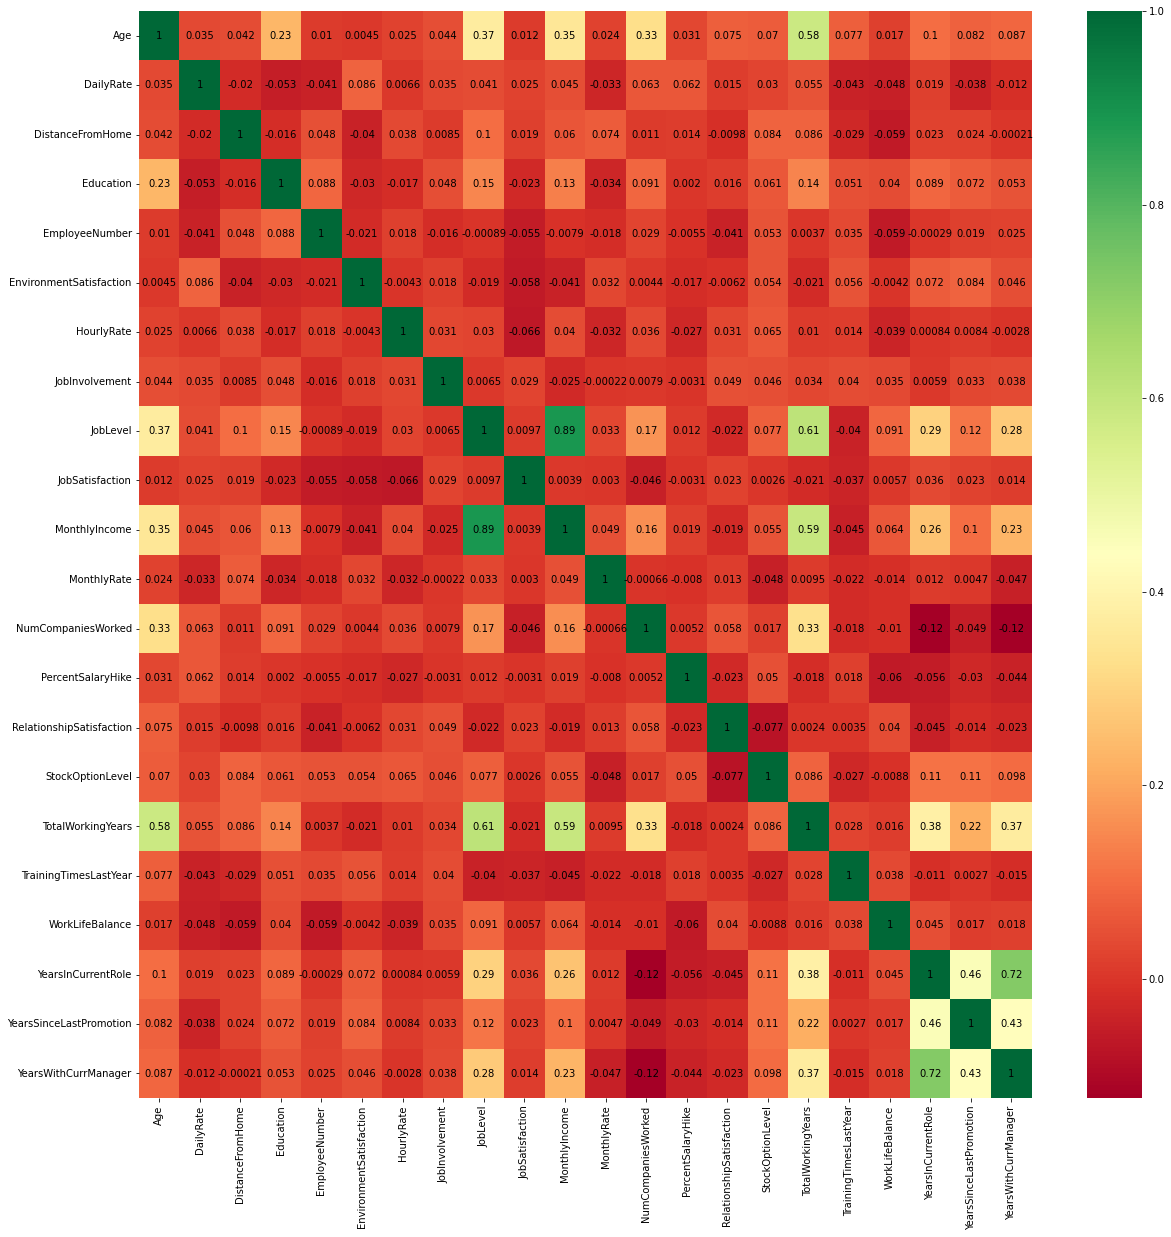

In [85]:
df1=df1.drop('PerformanceRating',axis=1)
plt.figure(figsize=(20,20))
color = plt.get_cmap('RdYlGn')   
color.set_bad('lightblue')   
sns.heatmap(df1.corr(), annot=True, cmap=color,annot_kws={'color':'black'}) 

Imp_features

['MonthlyIncome',
 'TotalWorkingYears',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'EmployeeNumber',
 'MonthlyRate',
 'YearsWithCurrManager',
 'YearsInCurrentRole',
 'OverTime_Yes',
 'StockOptionLevel',
 'YearsSinceLastPromotion',
 'PercentSalaryHike',
 'NumCompaniesWorked',
 'EnvironmentSatisfaction',
 'RelationshipSatisfaction']